In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import missingno as msno
import calendar
import math

from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_validate,KFold,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [2]:
dat=pd.read_excel("C:\\Users\\rishi\\Desktop\\Demandv1.1.xlsx")

In [3]:
data=dat.copy()

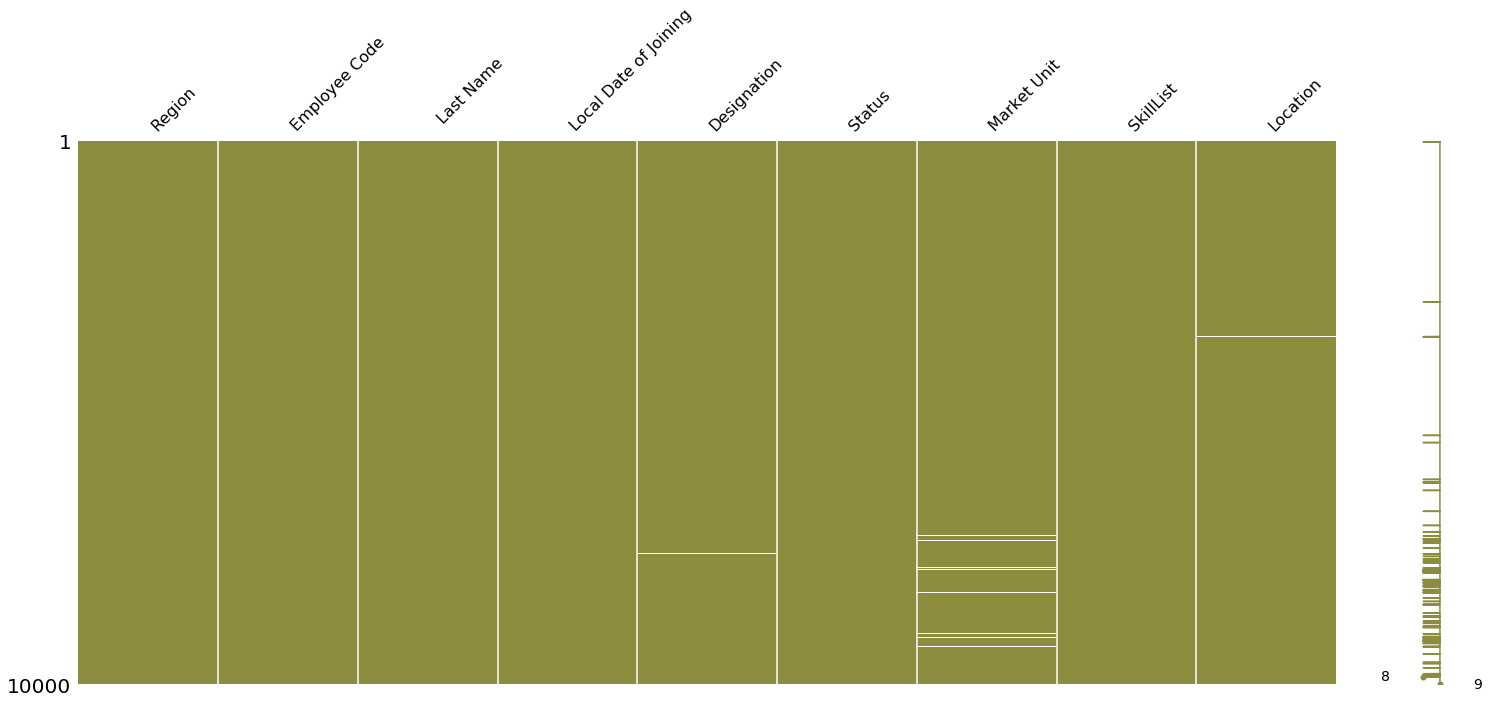

In [4]:
msno.matrix(data,color=(0.55, 0.55, 0.25));

In [5]:
data.isnull().sum()

Region                     0
Employee Code              0
  Last Name                0
Local Date of Joining      0
Designation                8
Status                     0
Market Unit              141
SkillList                  0
Location                  13
dtype: int64

In [6]:
print("Null Location value's are :",data.Location.isnull().sum())
data.Location=data.Location.fillna('bangalore')
print("Null Location value's after the preprocessing are :",data.Location.isnull().sum())

Null Location value's are : 13
Null Location value's after the preprocessing are : 0


In [7]:
data.Designation=data.Designation.fillna(9999)

In [8]:
Deman=pd.read_excel("C:\\Users\\rishi\\Desktop\\Demandv1.1.xlsx",sheet_name="Demand Trend Last year")

In [9]:
Demand=pd.DataFrame(Deman)

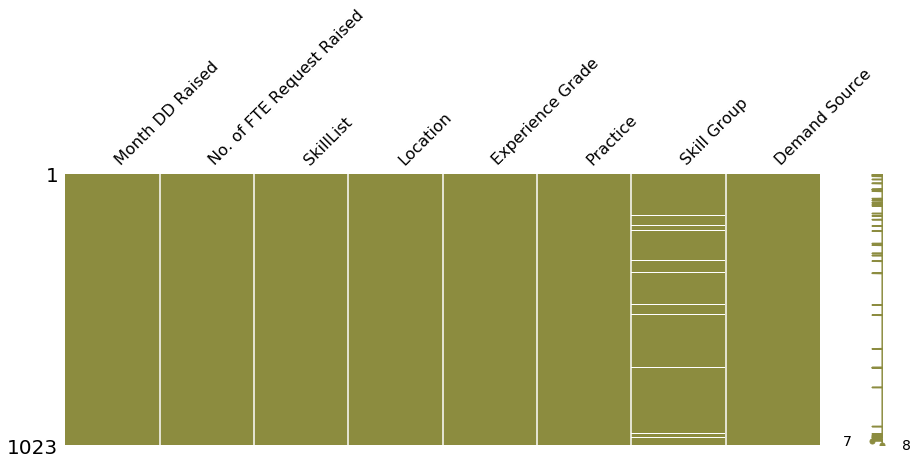

In [10]:
msno.matrix(Demand,color=(0.55, 0.55, 0.25),figsize=(15,5));

In [11]:
data.nunique()

Region                     14
Employee Code            9459
  Last Name              5937
Local Date of Joining    2003
Designation                13
Status                      2
Market Unit                12
SkillList                1167
Location                    9
dtype: int64

In [12]:
region=data.Region.unique()
region_dict=dict(zip(list(region),[i for i in range(0,len(region))]))
data.Region=data.Region.map(region_dict)

In [13]:
Location=data.Location.unique()
Location_dict=dict(zip(Location,[i for i in range(0,len(Location))]))
data.Location=data.Location.map(Location_dict)

In [14]:
designation_to_Experience_Grade={
 'Software associate':'A1',
'SOFTWARE ENGINEER':'A2',
'SENIOR SOFTWARE ENGINEER':'A3',
'Analyst':'A4',
'Senior Analyst':'A5',

'ASSOCIATE CONSULTANT':'B1',
'CONSULTANT':'B2',

'SENIOR CONSULTANT':'C1',
'MANAGER':'C2', 

'SENIOR MANAGER' :'D1',
'PORTFOLIO MANAGER':'D2',

'EXECUTIVE VICE PRESIDENT':'E1',
'VICE PRESIDENT':'E2',
'DIRECTOR':'E3',
'SENIOR DIRECTOR':'E4'
}

In [15]:
Experience_grade_toNumber=dict(zip(list(designation_to_Experience_Grade.values()),[i for i in range(0,15)]))

In [16]:
data.Designation=data.Designation.map(designation_to_Experience_Grade)
data.Designation=data.Designation.map(Experience_grade_toNumber)

In [17]:
data.Designation.isnull().sum()

8

In [18]:
data.Designation.fillna(9999,inplace=True)

In [19]:
data.Designation=[int(i) for i in data.Designation]

In [20]:
data.Designation.isnull().sum()

0

In [21]:
data.Status=data.Status.map({'Billable': 0,'Bench': 1})

In [22]:
Market_Unit=data['Market Unit'].unique()
Market_Unit_dict=dict(zip(Market_Unit,[i for i in range(0,len(Market_Unit))]))
data['Market Unit']=data['Market Unit'].map(Market_Unit_dict)

In [23]:
SkillList=data['SkillList'].unique()
SkillList_dict=dict(zip(SkillList,[i for i in range(0,len(SkillList))]))
data['SkillList']=data['SkillList'].map(SkillList_dict)

In [24]:
a=pd.DataFrame({'grade':list(Experience_grade_toNumber.keys()), 'Numeric':list(Experience_grade_toNumber.values())})
b=pd.DataFrame({'Post':list(designation_to_Experience_Grade.keys()), 'Numeric':list(Experience_grade_toNumber.values())})
designation_to_Experience_Grade_df=pd.merge(a,b,on='Numeric')

In [25]:
data.head()

,Region,Employee Code,Last Name,Local Date of Joining,Designation,Status,Market Unit,SkillList,Location
0,0,45149,AALLURI,2016-10-31,6,0,0,0,0
1,1,47875,AARATTUKULAM,2014-11-20,2,0,0,1,1
2,1,90386,AASHIK,2014-12-15,5,0,0,1,2
3,1,41161,Aastha,2015-02-26,5,0,0,2,1
4,1,92293,ABBAN,2013-12-02,6,0,0,3,3


In [26]:
Demand["Experience Grade"]=Demand["Experience Grade"].map(Experience_grade_toNumber)

In [27]:
Demand.Location=Demand.Location.map(Location_dict)

In [28]:
month_dict=dict((v,k) for k,v in enumerate(calendar.month_name))

In [29]:
Demand['Month DD Raised']=Demand['Month DD Raised'].map(month_dict)

In [30]:
#Demand.Location=Demand['Location'].map(Location_dict)

In [31]:
designation_to_Experience_Grade_df

,grade,Numeric,Post
0,A1,0,Software associate
1,A2,1,SOFTWARE ENGINEER
2,A3,2,SENIOR SOFTWARE ENGINEER
3,A4,3,Analyst
4,A5,4,Senior Analyst
5,B1,5,ASSOCIATE CONSULTANT
6,B2,6,CONSULTANT
7,C1,7,SENIOR CONSULTANT
8,C2,8,MANAGER
9,D1,9,SENIOR MANAGER


In [32]:
# checking, are we hiring the similar peolple or new people
result =  all(elem in dat.SkillList.unique()  for elem in Deman.SkillList.unique())
if result:
    print("Yes, Data(headcount) table contain all the elemement from Demand table")    
else :
    print("No, Data(headcount) table doesn't contain all the elemement from Demand table")

Yes, Data(headcount) table contain all the elemement from Demand table


In [33]:
Demand.SkillList=Demand.SkillList.map(SkillList_dict)

In [34]:
print('data (headcount has total Market Unit) ' + str(dat["Market Unit"].nunique()))
print('Demand  ' + str(Demand.Practice.nunique()))

data (headcount has total Market Unit) 12
Demand  11


Market unit and practise are the kind of thigs 


In [35]:
Market_Unit_dict.update({k: v for k, v in zip(['M&FT','TEST','ADM','CFS','DCX','Cards','I&D'],range(13,20))})

In [36]:
Demand.Practice=Demand.Practice.map(Market_Unit_dict)

In [37]:
Demand.isnull().sum()

Month DD Raised               0
No. of FTE Request Raised     0
SkillList                     0
Location                      0
Experience Grade              0
Practice                      0
Skill Group                  42
Demand Source                 0
dtype: int64

In [38]:
Demand.head()

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
0,5,4,0,0,3,0,(F) IT Operations,Account
1,10,2,1,1,6,13,(F) IT Operations,Account
2,3,2,1,2,2,14,NaN,Support
3,10,1,2,1,6,13,(F) IT Operations,Account
4,6,2,3,3,4,19,(D) Banking Sector,Proactive


In [39]:
data[data.Status==1].count()

Region                   396
Employee Code            396
  Last Name              396
Local Date of Joining    396
Designation              396
Status                   396
Market Unit              396
SkillList                396
Location                 396
dtype: int64

In [40]:
data[data.Status==1]
465465

465465

In [41]:
Demand.head()

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
0,5,4,0,0,3,0,(F) IT Operations,Account
1,10,2,1,1,6,13,(F) IT Operations,Account
2,3,2,1,2,2,14,NaN,Support
3,10,1,2,1,6,13,(F) IT Operations,Account
4,6,2,3,3,4,19,(D) Banking Sector,Proactive


In [42]:
Demand.sort_values(by='Month DD Raised',inplace=True)

In [43]:
Demand.reset_index(inplace=True)

In [44]:
del Demand['index']

In [45]:
Market_Unit_dict

{'BANK': 0,
 'INS': 1,
 'ANZ': 2,
 'OTHER': 3,
 'APAC': 4,
 'GP': 5,
 'FS': 6,
 'Insights & Data': 7,
 'ERP': 8,
 'Finance': 9,
 'HR': 10,
 'Mktg. & Grp. Sales': 11,
 nan: 12,
 'M&FT': 13,
 'TEST': 14,
 'ADM': 15,
 'CFS': 16,
 'DCX': 17,
 'Cards': 18,
 'I&D': 19}

In [46]:
Demand.sort_values(by=['Month DD Raised','SkillList','Location'],inplace=True)

In [47]:
DEMAND=Demand[['Month DD Raised','SkillList', 'Location','Experience Grade', 'Practice','No. of FTE Request Raised']]

In [48]:
DEMAND.reset_index(inplace=True)

In [49]:
del DEMAND['index']

In [50]:
DEMAND.head()

,Month DD Raised,SkillList,Location,Experience Grade,Practice,No. of FTE Request Raised
0,1,1,6,0,17,1
1,1,1,6,0,17,4
2,1,2,6,0,17,4
3,1,2,6,0,17,3
4,1,2,6,0,17,4


In [51]:
DEMAND.rename(columns={'No. of FTE Request Raised':'Request'},inplace=True)

C:\Users\rishi\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [52]:
processedDemand=pd.DataFrame(columns=['Month DD Raised','SkillList','Location','Experience Grade','Practice','Request'])


In [53]:
for i,k in DEMAND.groupby(['Month DD Raised','SkillList','Location','Experience Grade','Practice','Request']):
    processedDemand=pd.concat([processedDemand,k],ignore_index=True,join='inner')    

In [54]:
processedDemand.head()
#this is the processed data that contain clear information about the reuesrt for employee.
#this can be feed to make prediction about the demand. 

,Month DD Raised,SkillList,Location,Experience Grade,Practice,Request
0,1,1,6,0,17,1
1,1,1,6,0,17,4
2,1,2,6,0,17,2
3,1,2,6,0,17,3
4,1,2,6,0,17,4


In [55]:
data[data.Status==1].count()
#these 396 people can be assigned to work. 
#status 1 means that Employee is on bench.

Region                   396
Employee Code            396
  Last Name              396
Local Date of Joining    396
Designation              396
Status                   396
Market Unit              396
SkillList                396
Location                 396
dtype: int64

In [56]:
designation_to_Experience_Grade_df

,grade,Numeric,Post
0,A1,0,Software associate
1,A2,1,SOFTWARE ENGINEER
2,A3,2,SENIOR SOFTWARE ENGINEER
3,A4,3,Analyst
4,A5,4,Senior Analyst
5,B1,5,ASSOCIATE CONSULTANT
6,B2,6,CONSULTANT
7,C1,7,SENIOR CONSULTANT
8,C2,8,MANAGER
9,D1,9,SENIOR MANAGER


In [57]:
#there is no demand for the people with experience grade is greator than 7 ie. C1	7	SENIOR CONSULTANT
#we will only hire below the post of senior consultant. 
Demand[Demand['Experience Grade']>7]

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source


In [58]:
processedDemand.head()

,Month DD Raised,SkillList,Location,Experience Grade,Practice,Request
0,1,1,6,0,17,1
1,1,1,6,0,17,4
2,1,2,6,0,17,2
3,1,2,6,0,17,3
4,1,2,6,0,17,4


In [59]:
MonthlyRequest_df=pd.DataFrame(columns=processedDemand.columns.tolist())
totalRequest=[]
for i ,k in processedDemand.groupby(['Month DD Raised','SkillList','Location','Experience Grade','Practice']):
    totalRequest.append(k.Request.sum())
    ki=pd.DataFrame(k.iloc[0].T)  
    #print(ki.T)

    MonthlyRequest_df=pd.concat([MonthlyRequest_df,ki.T],ignore_index=True)
MonthlyRequest_df['MonthlyRequest']=totalRequest
del MonthlyRequest_df['Request']

In [60]:
MonthlyRequest_df.head()

,Month DD Raised,SkillList,Location,Experience Grade,Practice,MonthlyRequest
0,1,1,6,0,17,5
1,1,2,6,0,17,13
2,1,5,6,0,17,6
3,1,8,6,0,17,23
4,1,12,6,0,17,7


In [61]:
X=MonthlyRequest_df[['Month DD Raised', 'SkillList', 'Location', 'Experience Grade','Practice']]

In [62]:
Y=MonthlyRequest_df[ 'MonthlyRequest']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=0)

In [64]:
X_train.count()

Month DD Raised     512
SkillList           512
Location            512
Experience Grade    512
Practice            512
dtype: int64

In [65]:
X_test.count()

Month DD Raised     129
SkillList           129
Location            129
Experience Grade    129
Practice            129
dtype: int64

In [66]:
models=[LinearRegression(),RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()]
model_names=['LinearRegression','RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    test_pred=clf.predict(X_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
    d={'Modelling Algo':model_names,'RMSLE':rmsle}   
pd.DataFrame(d)

,Modelling Algo,RMSLE
0,LinearRegression,0.579941
1,RandomForestRegressor,0.597868
2,AdaBoostRegressor,0.699918
3,BaggingRegressor,0.591720
4,KNeighborsRegressor,0.577136


In [67]:
#random forest and knn regressor is giving the lowest rmsle that why I am using the these two for final prediction.

In [68]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [69]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, 
                               cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_test,y_test)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 10.3min finished


RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [70]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [71]:
reg=RandomForestRegressor(n_estimators= 400,min_samples_split=10,min_samples_leaf= 4,max_features='auto',
                          max_depth= 70,bootstrap= True)

In [72]:
reg.fit(X_test,y_test)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=70,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [73]:
pred=reg.predict(X_test)

In [74]:
mean_squared_error(pred,y_test)

5.40009538145802

In [75]:
mean_squared_log_error(y_test,pred)

0.1822209188999091

In [76]:
r2_score(y_test, pred)

0.41125955054611674


# knn regressor 

In [77]:
k_range = list(range(1, 31))

In [78]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [79]:
grid = GridSearchCV(KNeighborsRegressor(), param_grid,scoring='neg_mean_squared_log_error', cv=10,n_jobs=-1)

In [80]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_log_error', verbose=0)

In [81]:
grid.grid_scores_

C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: -0.51535, std: 0.13929, params: {'n_neighbors': 1},
 mean: -0.42382, std: 0.09797, params: {'n_neighbors': 2},
 mean: -0.37489, std: 0.07316, params: {'n_neighbors': 3},
 mean: -0.34077, std: 0.06301, params: {'n_neighbors': 4},
 mean: -0.34169, std: 0.07148, params: {'n_neighbors': 5},
 mean: -0.35063, std: 0.07490, params: {'n_neighbors': 6},
 mean: -0.34507, std: 0.07506, params: {'n_neighbors': 7},
 mean: -0.34469, std: 0.07702, params: {'n_neighbors': 8},
 mean: -0.34044, std: 0.07471, params: {'n_neighbors': 9},
 mean: -0.33603, std: 0.07525, params: {'n_neighbors': 10},
 mean: -0.33073, std: 0.08294, params: {'n_neighbors': 11},
 mean: -0.33009, std: 0.08612, params: {'n_neighbors': 12},
 mean: -0.33567, std: 0.08918, params: {'n_neighbors': 13},
 mean: -0.33104, std: 0.08303, params: {'n_neighbors': 14},
 mean: -0.33103, std: 0.08539, params: {'n_neighbors': 15},
 mean: -0.33290, std: 0.08936, params: {'n_neighbors': 16},
 mean: -0.33170, std: 0.08891, params: {'n_neighb

In [82]:
print('Parameters')
print(grid.grid_scores_[0].parameters)
print('')
print('CV Validation Score')
print(grid.grid_scores_[0].cv_validation_scores)
print('')
print('Mean Validation Score')
print(grid.grid_scores_[0].mean_validation_score)

Parameters
{'n_neighbors': 1}

CV Validation Score
[-0.49722933 -0.39744364 -0.44855543 -0.85760585 -0.60192997 -0.60020536
 -0.45027746 -0.54234274 -0.34835421 -0.41222107]

Mean Validation Score
-0.5153497869543124


C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


C:\Users\rishi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


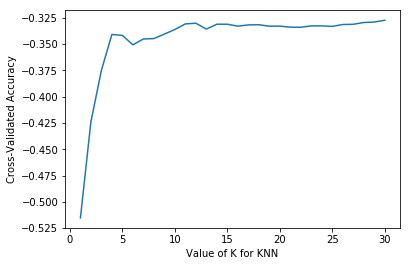

In [83]:
grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
plt.plot(k_range, grid_mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy');

In [84]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

-0.3272523633751552
{'n_neighbors': 30}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=30, p=2,
          weights='uniform')


In [85]:
knn=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=30, p=2,
          weights='uniform')

In [86]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=30, p=2,
          weights='uniform')

In [87]:
knnPred=knn.predict(X_test)

In [88]:
# this is the result of the knn regressor
mean_squared_log_error(y_test,knnPred)

0.3309498328743857

In [89]:
#this is the result of random forest 
mean_squared_log_error(y_test,pred)

0.1822209188999091

# so for now I'll use random forest regressor for making the prediction. 

# for making the prediction I am using the only Month DD Raised, SkillList, Location, Experience Grade, Practice, MonthlyRequest. 
# when someone is using algo. for making the prediction in the background it automatically making predictions for 2 months in advance. e.g. you make a prediction for January then it will automatically give you result for Feb and March. 

# and I am using the random forest algorithm for making prediction for making prediction because it has low root mean Square log error.

In [90]:
employeeOnBench_df=data[data.Status==1][['Employee Code', 'Local Date of Joining','Designation',
                                         'Status', 'Market Unit', 'SkillList', 'Location']]

In [91]:
monthOnBench=[i.month for i in  employeeOnBench_df['Local Date of Joining']]

In [92]:
employeeOnBench_df['MonthOnBench']=monthOnBench

In [93]:
groupbyEmployee_df=pd.DataFrame(columns=['Employee Code','MonthOnBench','SkillList','Location','Designation','Market Unit'])
for i,k in employeeOnBench_df.groupby(['MonthOnBench','SkillList','Location','Designation','Market Unit']):
    groupbyEmployee_df=pd.concat([groupbyEmployee_df,k[['Employee Code','MonthOnBench','SkillList','Location','Designation','Market Unit']]],ignore_index=True)

In [94]:
groupbyEmployee_df.head(1)

,Employee Code,MonthOnBench,SkillList,Location,Designation,Market Unit
0,52594,1,5,4,10,0


In [95]:
groupbyEmployee_df.columns

Index(['Employee Code', 'MonthOnBench', 'SkillList', 'Location', 'Designation',
       'Market Unit'],
      dtype='object')

In [96]:
def checking_For_The_Employee_From_Bench(Month,SkillList,ExperienceGrade,Practice,requiement_for_next_month,request_Location):
    print('--------------------------------------------------------------------------------------------')
    print('\n\t\tchecking For the Employee From Bench\n')
    df=groupbyEmployee_df[(groupbyEmployee_df.MonthOnBench==Month)&(groupbyEmployee_df.SkillList==SkillList)&
              (groupbyEmployee_df.Designation==ExperienceGrade)&(groupbyEmployee_df['Market Unit']==Practice)]
    if df.count()[0]==0:
        print("Right now We don't have any Employee on Bench for desired skillset")
        print("we need to hire {} employee".format(requiement_for_next_month))
        print('checking The Employee From Bench who just below require Designation')
    else:
        print('These Employee can be assigned to project')
        print(df)
        requiement_for_next_month=requiement_for_next_month-df.count()[0]
        print('we do need to hire {}'.format(requiement_for_next_month))
        vacantDesignation.extend(df.Designation)
        vacantLocation.extend(df.Location)
        vacantMarketUnit.extend(df['Market Unit'])
        vacantSkilllist.extend(df.SkillList)
    print('These employee can be promoted to fulfill the reuiqrement \n')
    if requiement_for_next_month>0:
        checking_For_The_Employee_From_Bench_who_just_below_require_Designation(SkillList=SkillList,
                                                                             ExperienceGrade=ExperienceGrade,
                                                                             Practice=Practice,
                                                                        requiement_for_next_month=requiement_for_next_month,request_Location=request_Location)
    else: 
        print('Requirement Fulfilled')

In [97]:
groupbyEmployee_df.head(1)

,Employee Code,MonthOnBench,SkillList,Location,Designation,Market Unit
0,52594,1,5,4,10,0


# we do need to start working from here 

In [98]:
def checking_For_The_Employee_From_Bench_who_just_below_require_Designation(SkillList,ExperienceGrade,Practice,requiement_for_next_month,request_Location):
    print('--------------------------------------------------------------------------------------------')
    print("\n\tchecking For The Employee From Bench who are just below require Designation Method \n")

    _=groupbyEmployee_df[(groupbyEmployee_df.SkillList==SkillList)&(groupbyEmployee_df.Designation==ExperienceGrade-1)
                              &(groupbyEmployee_df['Market Unit']==Practice)][['Employee Code','Location','SkillList','Designation','Market Unit']]
    if _.count()[0]!=0:
        print(_)
    else:
        print('Searching the Employees those can be promoted from Location from where request is genrated')
    requiement_for_next_month=requiement_for_next_month-  _.count()[0]
    print('\nStill we do need to hire {} Employees to fulfill the requireent'.format( requiement_for_next_month))
    #print(' with these skills',SkillList,ExperienceGrade,Practice,requiement_for_next_month,request_Location)
    #_[['SkillList','Location','Designation','Market Unit']]
    vacantDesignation.extend(_.Designation)
    vacantLocation.extend(_.Location)
    vacantMarketUnit.extend(_['Market Unit'])
    vacantSkilllist.extend(_.SkillList)
    if requiement_for_next_month>0:
        promotionFromSameLocation(SkillList,ExperienceGrade,Practice,requiement_for_next_month,request_Location)
    else:
        print('Requirement Fulfilled')
    
    

In [99]:
Demand.head(1)

,Month DD Raised,No. of FTE Request Raised,SkillList,Location,Experience Grade,Practice,Skill Group,Demand Source
4,1,1,1,6,0,17,(T) Web Development Technologies,Proactive


In [100]:
vacantDesignation=[]
vacantSkilllist=[]
vacantLocation=[]
vacantMarketUnit=[]
def prediction(Month,SkillList,Location,ExperienceGrade,Practice):

    print('--------------------------------------------------------------------------------------------')

    if Month==12:
        Month1=1
        Month2=2
    else:
        Month1=Month+1
        Month2=Month+2
    for i in list([Month,Month1,Month2]):
        print('Month of:',list(month_dict.keys())[list(month_dict.values()).index(i)] )
    print('Required Skillset is : {}'.format(list(SkillList_dict.keys())[list(SkillList_dict.values()).index(SkillList)]))
    print("Location is : {}".format(list(Location_dict.keys())[list(Location_dict.values()).index(Location)]))
    
    print('Designation is :',list(designation_to_Experience_Grade.keys())[list(designation_to_Experience_Grade.values()).index(list(Experience_grade_toNumber.keys())[list(Experience_grade_toNumber.values()).index(ExperienceGrade)])])
    
    print('Practice in :',list(Market_Unit_dict.keys())[list(Market_Unit_dict.values()).index(Practice)])

    
    print('--------------------------------------------------------------------------------------------')
    print("\n\t\t\t Prediction Method\n")
    req=[]
    req.append(list(reg.predict([[Month,SkillList,Location,ExperienceGrade,Practice]]))[0])
    req.append(list(reg.predict(list([[Month1,SkillList,Location,ExperienceGrade,Practice]])))[0])
    req.append(list(reg.predict(list([[Month2,SkillList,Location,ExperienceGrade,Practice]])))[0])
    print('We do need these empoyees in upcoming two months \n')
    print(pd.DataFrame({'Month':[Month,Month1,Month2],'SkillList':[SkillList,SkillList,SkillList],
                        'Location':[Location,Location,Location],
                        'ExperienceGrade':[ExperienceGrade,ExperienceGrade,ExperienceGrade],
                        'Practice':[Practice,Practice,Practice],'Request':req}),'\n')
    requiement_for_next_month = math.ceil(sum(req))
    print('Company need {} emoplyee to fulfill the Demand'.format(requiement_for_next_month),'\n')

    print("checking for the required employee in the bench dataset \n")
    if len(req)>0:
        checking_For_The_Employee_From_Bench(Month,SkillList,ExperienceGrade,Practice,requiement_for_next_month,Location)
    else:
        print("Requirement fulfilled")
    print('with: {}'.format(list(SkillList_dict.keys())[list(SkillList_dict.values()).index(SkillList)]),'Skill set')
    print("Location is : {}".format(list(Location_dict.keys())[list(Location_dict.values()).index(Location)]))
    
    print('Designation is :',list(designation_to_Experience_Grade.keys())[list(designation_to_Experience_Grade.values()).index(list(Experience_grade_toNumber.keys())[list(Experience_grade_toNumber.values()).index(ExperienceGrade)])])
    
    print('Practice in :',list(Market_Unit_dict.keys())[list(Market_Unit_dict.values()).index(Practice)])
    print('--------------------------------------------------------------------------------------------')
    
    def locator(Designation,skillist,marketunit,location,k):
        desig=list(designation_to_Experience_Grade.keys())[list(designation_to_Experience_Grade.values()).index(list(Experience_grade_toNumber.keys())[list(Experience_grade_toNumber.values()).index(ExperienceGrade)])]
        skill=list(SkillList_dict.keys())[list(SkillList_dict.values()).index(skillist)]
        pract=list(Market_Unit_dict.keys())[list(Market_Unit_dict.values()).index(marketunit)]
        locata=list(Location_dict.keys())[list(Location_dict.values()).index(Location)]
        print('Due to promotion,',k,'seat will beacome vacant at',locata,'with these skill',skill,'and postition is ',desig)
        

    
    if(len(vacantDesignation)>0):
        awe=pd.DataFrame({'vacantDesignation':vacantDesignation,"vacantSkilllist":vacantSkilllist,'vacantMarketUnit':vacantMarketUnit,'vacantLocation':vacantLocation})
        print('\t\tNew vacant seats due to promotion\n')
        print(awe)
        vacantDesignation.clear()
        vacantLocation.clear()
        vacantMarketUnit.clear()
        vacantSkilllist.clear()
        vacantSeat=[]
        aww=pd.DataFrame({'vacantDesignation':vacantDesignation,"vacantSkilllist":vacantSkilllist,'vacantMarketUnit':vacantMarketUnit,'vacantLocation':vacantLocation})
        for i,k in awe.groupby(['vacantDesignation','vacantLocation','vacantMarketUnit','vacantSkilllist']):
            ind=aww.index.max()
            aww.at[ind+1]=k.iloc[0].values
            oooo=aww.at[ind+1]=k.iloc[0].values
            locator(oooo[0],oooo[1],oooo[2],oooo[3], k.count()[0])
            
    print('--------------------------------------------------------------------------------------------\n')

            
    print('\t\t\t\t####################')
    print('Experience is counted in year and sorted in descending order throughout the code')
    
    print('--------------------------------------------------------------------------------------------')
            
            
            
        

# till now I am  trying to make our employee billable as many possible  from Bench Employee.

# now I am searching the potential candidates from the headcount employee dataset those can get the promotion (these employee are still billable working on a project) so we can hire employee internally.  

# employee having more than 3 years only will get the promotion I am just assuming this 

In [101]:
billable_employe_df=data[data.Status==0]

In [102]:
year=[i.year for i in billable_employe_df['Local Date of Joining']]

In [103]:
current_year=2018 

In [104]:
experience_Y=[current_year -i for i in year]

In [105]:
billable_employe_df['Experience_Y']=experience_Y

C:\Users\rishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
billable_employe_df.head(1)

,Region,Employee Code,Last Name,Local Date of Joining,Designation,Status,Market Unit,SkillList,Location,Experience_Y
0,0,45149,AALLURI,2016-10-31,6,0,0,0,0,2


In [107]:
billable_employe_df.columns

Index(['Region', 'Employee Code', '  Last Name', 'Local Date of Joining',
       'Designation', 'Status', 'Market Unit', 'SkillList', 'Location',
       'Experience_Y'],
      dtype='object')

In [108]:
billable_employe_df.head(1)

,Region,Employee Code,Last Name,Local Date of Joining,Designation,Status,Market Unit,SkillList,Location,Experience_Y
0,0,45149,AALLURI,2016-10-31,6,0,0,0,0,2


In [109]:
def promotionFromSameLocation(SkillList,ExperienceGrade,Practice,requiement_for_next_month,request_Location):
    
    print('--------------------------------------------------------------------------------------------')
    print('\n\t\t\tpromotion From Same Location\n')
    print('\nExperience is in year & employee are sorted in descending order of experience')
    print('\n these employee can be promoted from same location to fulfill the demand \n')
    same_Location_employee=billable_employe_df[(billable_employe_df.SkillList==SkillList)&
                              (billable_employe_df.Designation==ExperienceGrade-1)&
                              (billable_employe_df.Location==request_Location)&(billable_employe_df.Experience_Y>2)][['Employee Code', '  Last Name',
                               'Designation',  'SkillList','Experience_Y','Location','Market Unit']].sort_values(by='Experience_Y',ascending=False)
    requiement_for_next_month=requiement_for_next_month-same_Location_employee.count()[0]
    if same_Location_employee.count()[0]==0:
        print("Right Now at {} this office no one for promotion".format(list(Location_dict.keys())[list(Location_dict.values()).index(request_Location)]))
    
    else:
        print(same_Location_employee)
    print("\nStill we do need {} more employees".format(requiement_for_next_month))
    if requiement_for_next_month>0:
        promotionFromDifferentLocation(SkillList,ExperienceGrade,Practice,requiement_for_next_month,request_Location)
    else: 
        print("Requirement Fulfilled")
    
    vacantDesignation.extend(same_Location_employee.Designation)
    vacantMarketUnit.extend(same_Location_employee['Market Unit'])
    vacantSkilllist.extend(same_Location_employee.SkillList)
    for i in range(0,same_Location_employee.count()[0]):
        vacantLocation.append(request_Location)    

In [110]:
def promotionFromDifferentLocation(SkillList,ExperienceGrade,Practice,requiement_for_next_month,request_Location):
    print('--------------------------------------------------------------------------------------------')
    print("\n\t\t\tPromotion From Different Location\n")
    print('\n these employee can be relocated from location other location to fulfill the demand with a promotion  \n')
    employee_for_desired_location_from_different_Location=billable_employe_df[(billable_employe_df.SkillList==SkillList)&
                              (billable_employe_df.Designation==ExperienceGrade-1)&(billable_employe_df.Experience_Y>2)][['Employee Code', '  Last Name',
                               'Designation',  'SkillList','Experience_Y','Location']].sort_values(by='Experience_Y',ascending=False)
    if employee_for_desired_location_from_different_Location.count()[0]==0:
        print('\t\tNo match found')
        
    else:
        print(employee_for_desired_location_from_different_Location)
    
    requiement_for_next_month=requiement_for_next_month-employee_for_desired_location_from_different_Location.count()[0]
    print("\nStill we need to hire :",requiement_for_next_month,"Employee")

In [111]:
prediction(Month=7,SkillList=5,Location=8,ExperienceGrade=10,Practice=1)

--------------------------------------------------------------------------------------------
Month of: July
Month of: August
Month of: September
Required Skillset is : Angular.js
Location is : bangalore
Designation is : PORTFOLIO MANAGER
Practice in : INS
--------------------------------------------------------------------------------------------

			 Prediction Method

We do need these empoyees in upcoming two months 

   Month  SkillList  Location  ExperienceGrade  Practice   Request
0      7          5         8               10         1  9.389035
1      8          5         8               10         1  9.391431
2      9          5         8               10         1  9.391431 

Company need 29 emoplyee to fulfill the Demand 

checking for the required employee in the bench dataset 

--------------------------------------------------------------------------------------------

		checking For the Employee From Bench

Right now We don't have any Employee on Bench for desired skillse

# Now I am making some changes in the dataset to demonstrate when it'll be deployed to original data or if it has found the desired match then how it is going to perform.

In [112]:
groupbyEmployee_df.at[199,'Location']=8
groupbyEmployee_df.at[199,'Designation']=10
groupbyEmployee_df.at[199,'SkillList']=5
groupbyEmployee_df.at[210,'Location']=1
groupbyEmployee_df['Market Unit'].at[210]=1
groupbyEmployee_df.at[210,'Designation']=9
groupbyEmployee_df.at[210,'SkillList']=5
groupbyEmployee_df.at[250,'Location']=6
groupbyEmployee_df.at[250,'Designation']=9
groupbyEmployee_df.at[250,'SkillList']=5
billable_employe_df.at[8,'Location']=8
billable_employe_df.at[2110,'Location']=8
billable_employe_df.at[8869,'Location']=8
billable_employe_df.at[2110,'Market Unit']=1
billable_employe_df.at[8869,'Market Unit']=1

In [113]:
prediction(Month=7,SkillList=5,Location=8,ExperienceGrade=10,Practice=1)

--------------------------------------------------------------------------------------------
Month of: July
Month of: August
Month of: September
Required Skillset is : Angular.js
Location is : bangalore
Designation is : PORTFOLIO MANAGER
Practice in : INS
--------------------------------------------------------------------------------------------

			 Prediction Method

We do need these empoyees in upcoming two months 

   Month  SkillList  Location  ExperienceGrade  Practice   Request
0      7          5         8               10         1  9.389035
1      8          5         8               10         1  9.391431
2      9          5         8               10         1  9.391431 

Company need 29 emoplyee to fulfill the Demand 

checking for the required employee in the bench dataset 

--------------------------------------------------------------------------------------------

		checking For the Employee From Bench

These Employee can be assigned to project
    Employee Code Month

# Prediction for some more cases 

In [114]:
#prediction(Month=2,SkillList=5,Location=5,ExperienceGrade=10,Practice=10)
#prediction(Month=12,SkillList=45,Location=1,ExperienceGrade=10,Practice=1)
#prediction(Month=10,SkillList=11,Location=2,ExperienceGrade=10,Practice=1)
#prediction(Month=4,SkillList=11,Location=2,ExperienceGrade=10,Practice=1)
#prediction(Month=2,SkillList=5,Location=5,ExperienceGrade=10,Practice=10)
#prediction(Month=12,SkillList=45,Location=5,ExperienceGrade=10,Practice=1)

#                                         thank you !!!!

In [115]:
pwd

'C:\\Users\\rishi'